In [27]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

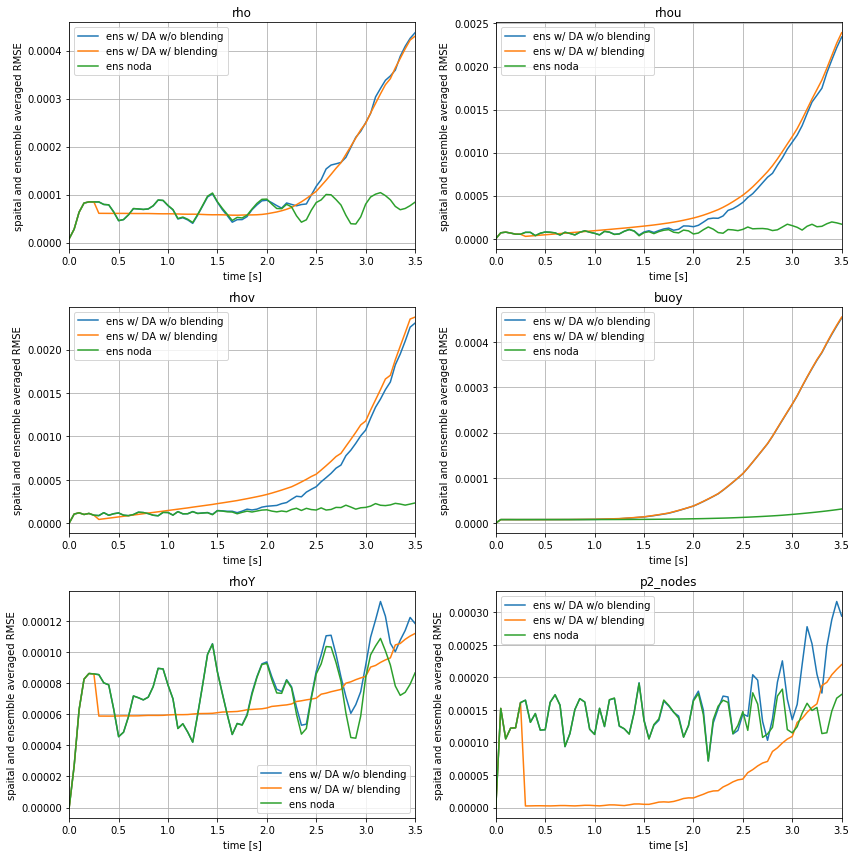

In [30]:
times = np.arange(0.0,3.51,0.05)
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

fn = 'batch-obs'
base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

probe_loc = [25,37]

Nx = 100
Ny = 50
et = 3.5
p_ref = 8.61 * 1e4


pl = pt.plotter_1d()
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)

for i,attribute in enumerate(attributes):
    ens_noda_suffix = 'comp_noda'
    ens_noda = tc.get_ensemble(times, 10, attribute, ens_noda_suffix, label_type='TIME')

    prt.prtt('load1')
    
    ens_1_suffix = 'comp_delth_rloc'
    ens_1 = tc.get_ensemble(times, 10, attribute, ens_1_suffix, label_type='TIME')
    
    prt.prtt('load2')
    
    ens_2_suffix = tc.cb_suffix(1,0,'delth_rloc')
    ens_2 = tc.get_ensemble(times, 10, attribute, ens_2_suffix, label_type='TIME')
    
    prt.prtt('load3')

    psinc = tc.get_ensemble(times, 1, attribute, 'psinc', label_type='TIME')
    
    prt.prtt('load4')
    
    ax = pl.get_ax(i)

    diff_ens_1 = tc.spatially_averaged_rmse(ens_1, psinc, avg=True)
    diff_ens_2 = tc.spatially_averaged_rmse(ens_2, psinc, avg=True)
    diff_noda = tc.spatially_averaged_rmse(ens_noda, psinc, avg=True)
    
    ax.plot(times,diff_ens_1, label='ens w/ DA w/o blending')
    ax.plot(times,diff_ens_2, label='ens w/ DA w/ blending')
    ax.plot(times,diff_noda, label='ens noda')

    ax.set_title("%s" %attribute)
    ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel('spaital and ensemble averaged RMSE')
    ax.set_xlabel('time [s]')
    ax.grid()
    ax.legend()

    prt.prtt('plt')
    
plt.tight_layout()
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()